In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('../src/')
from data_treatment import update_dataframe
from make_figures import do_SR, do_SR_mesa
%matplotlib inline

df_deltaA =pd.read_json("../data/EDO_DELTA_AMACURO.json",lines=True)
df_Merida =pd.read_json("../data/EDO_MERIDA.json",lines=True)
df_Vargas =pd.read_json("../data/EDO_VARGAS.json",lines=True)
df_MONAGAS =pd.read_json("../data/EDO_MONAGAS.json",lines=True)

In [2]:
variables = [u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
     u'ELECTORES ACTAS TRANSMITIDAS', u'ELECTORES INSCRITOS',
       u'VOTANTES ESCRUTADOS', u'VOTOS ESCRUTADOS', u'VOTOS NULOS',
       u'VOTOS VALIDOS', u'centro', u'estado', u'mesa',u'municipio', u'parroquia','Abstencion_%',
       u'PSUV_%',u'PSUV_N',u'MUD_%',u'MUD_N', u'rescaled_N',u'parroquia_residual',
       u'municipio_residual',u'centro_residual',u'estado_residual',
       u'parroquia_standarised_residual', u'municipio_standarised_residual',u'centro_standarised_residual',
          u'estado_standarised_residual']

#DELTA AMACURO
df_out_deltaAmacuro = update_dataframe(df_deltaA,'LIZETA HERNANDEZ','LARISSA GONZALEZ')[variables]
#MONAGAS
df_out_MONAGAS = update_dataframe(df_MONAGAS,'YELITZE SANTAELLA','GUILLERMO CALL')[variables]
#MERIDA
df_out_Merida = update_dataframe(df_Merida,'JEHYSON GUZMAN','RAMON GUEVARA')[variables]
# VARGAS
df_out_Vargas = update_dataframe(df_Vargas, 'JORGE GARCIA CARNEIRO', 'JOSE MANUEL OLIVARES')[variables]
frames = [df_out_Merida,df_out_deltaAmacuro,df_out_MONAGAS,df_out_Vargas]
df_out = pd.concat(frames)

# Data:

Results from Merida, Vargas, Monagas and Delta Amacuro.

Data unit is the result in each 'mesa' of an electoral centre. 

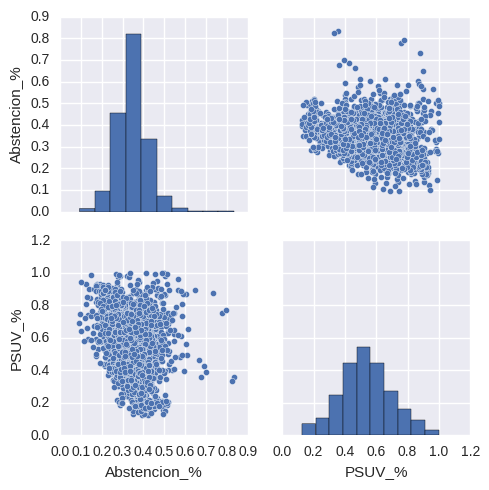

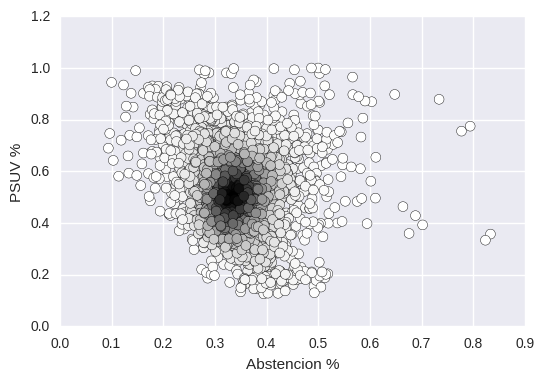

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['Abstencion_%'], df_out['PSUV_%']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['Abstencion_%'], df_out['PSUV_%'], c=z, s=50)
plt.xlabel('Abstencion %')
plt.ylabel('PSUV %')
plt.show()


# Metrics:

Main metric is the Standarised residuals (SR) or Z-score:


residual_centro = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{centro}})$ 

residual_parroquia = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{parroquia}})$

residual_municipio = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{municipio}})$

residual_estado = $(1 - \frac{\%Psuv_{mesa}}{\%Psuv_{estado}})$

$\underline{Standarised Residual}$ = $\frac{residual}{\sigma_{residual}}$ for each level (centro, parroquia, municipio...)

Deviations in favour of PSUV are shown on negative values of SR.

# Standarised residual for each mesa with respect to its centro (only centros with more than 1 'mesa'):

Gaussian distribution, if an external source affects the result in a 'mesa', it will affect the whole 'centro electoral'.

No relative effect observed, this can be our control sample. 


inclusive data (all mesas)
mean  -0.0910679965088
std  0.999918904885


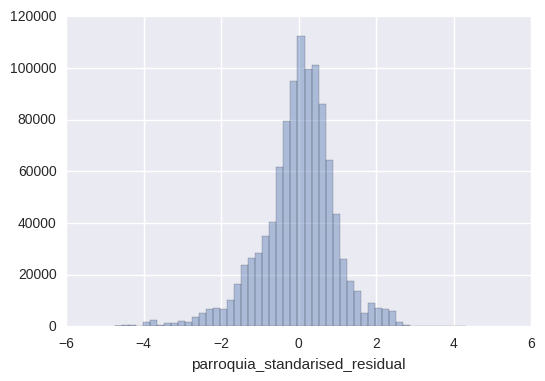

In [4]:
do_SR(df_out)

# Standarised residual for each mesa with respect to its 'parroquia':

Observing slighly larger tails on the negative side, where PSUV would show larger percentange of votes wrt the result in the parroquia.


inclusive data (all mesas)
mean  -0.0910679965088
std  0.999918904885


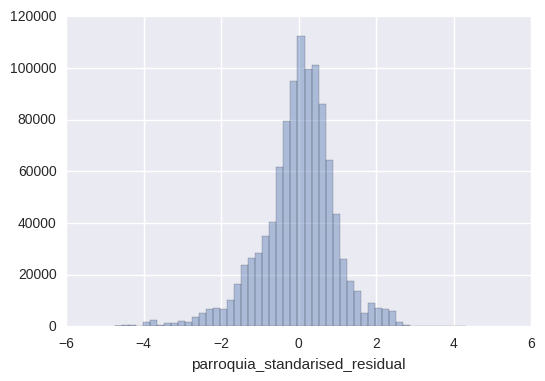

In [ ]:
do_SR(df_out)


In [ ]:
do_SR_mesa(df_out)


# RESULTS PER STATE:

Effect changes from state to state:
## MERIDA

Visible asymmetry on tails for the parroquia SR.

In [ ]:
do_SR(df_out_Merida)

In [ ]:
do_SR_mesa(df_out_Merida)

## VARGAS

In [ ]:
do_SR(df_out_Vargas)

In [ ]:
do_SR_mesa(df_out_Vargas)

## MONAGAS

In [ ]:
do_SR(df_out_MONAGAS)

In [ ]:
do_SR_mesa(df_out_MONAGAS)

## Delta Amacuro

In [ ]:
do_SR(df_deltaA)

In [ ]:
do_SR_mesa(df_deltaA)